## Article Level EDA

In [1]:
import pandas as pd
dataframe = pd.read_csv('Data/datasets-v5/task-1/task1.train.txt', sep="\t", header=None, \
                        names=["text", "article_id", "label"])

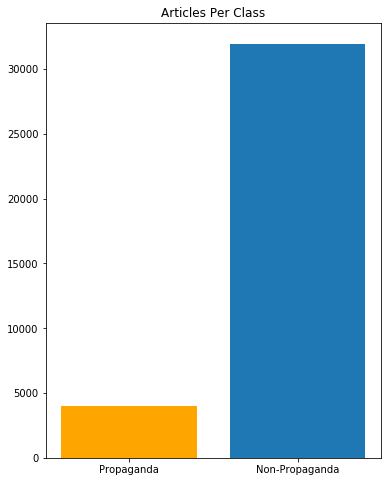

In [52]:
import matplotlib.pyplot as plt
class_freq_count = []

plt.figure(figsize=(6,8))

labels = ["Propaganda", "Non-Propaganda"]
class_freq_count.append(dataframe[dataframe["label"] == "propaganda"]["label"].count())
class_freq_count.append(dataframe[dataframe["label"] == "non-propaganda"]["label"].count())

barlist = plt.bar(labels, class_freq_count)
barlist[0].set_color('orange')

plt.xticks(labels)
plt.title('Articles Per Class');

plt.show()

In [30]:
from glob import iglob
import pandas as pd
import re
import numpy as np

data = pd.DataFrame(columns=["article_id", "article", "propaganda"])
technique = dict()

for path in iglob("Data/datasets-v5/tasks-2-3/train/*"):
    file_name = path.split("/")[-1]
    extensions = file_name.split(".")
    article_id = re.search("article([0-9]+)", extensions[0]).group(1)
    if article_id not in data.article_id.values:
        data = data.append({"article_id" : article_id , "article" : '', "propaganda" : ''}, ignore_index=True)
    if extensions[1] == "txt":
        with open(path, 'r') as f:
            data.loc[data.article_id == article_id, 'article'] = f.read()
    elif extensions[1] == "task2":
        with open(path, 'r') as f:
            data.loc[data.article_id == article_id, 'propaganda'] = f.read()
    elif extensions[1] == "task3":
        with open(path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                tech = line.split("\t")[1]
                if tech in technique:
                    technique[tech] += 1
                else:
                    technique[tech] = 1
            

In [31]:
data

,article_id,article,propaganda
0,788173482,Exposing the Deep State Plotters\n\nPresident ...,788173482\t1\tpropaganda\n788173482\t2\tnon-pr...
1,701225819,South Florida Muslim Leader Sofian Zakkout’s D...,701225819\t1\tnon-propaganda\n701225819\t2\tno...
2,758477392,US embassy worker in China suffers 'brain inju...,758477392\t1\tnon-propaganda\n758477392\t2\tno...
3,698092698,Las Vegas Shooting: A THIRD Timeline Emerges\n...,698092698\t1\tnon-propaganda\n698092698\t2\tno...
4,757713354,Not So Fast\n\nIt’s got to be either one of th...,757713354\t1\tnon-propaganda\n757713354\t2\tno...
...,...,...,...
288,754508491,The latest Ebola outbreak in DR Congo has left...,754508491\t1\tnon-propaganda\n754508491\t2\tno...
289,772947654,"Newt Gingrich: The truth about Trump, Putin, a...",772947654\t1\tnon-propaganda\n772947654\t2\tno...
290,774904810,Army Colonel: False Flag ‘Gulf of Tonkin Incid...,774904810\t1\tnon-propaganda\n774904810\t2\tno...
291,111111137,Florida shooting: Gun control law moves step c...,111111137\t1\tnon-propaganda\n111111137\t2\tno...


In [34]:
clean_data = pd.DataFrame(columns=["article_id", "article", "propaganda"])

def clean_up(row):
    res = []
    a_id = row[0]
    art = row[1].split("\n")
    prop = row[2].split("\n")
    for record in prop:
        if record == '':
            continue
        element = []
        propaganda_type = record.split("\t")
        sentence = art[int(propaganda_type[1])-1]
        if sentence == '':
            continue
        element.append(a_id)
        element.append(sentence)
        element.append(propaganda_type[2])
        res.append(element)
    res = pd.DataFrame(res, columns=["article_id", "article", "propaganda"])
    return res
    
sentence_data = data.apply(clean_up, axis=1)

for s in sentence_data:
    clean_data = clean_data.append(s, ignore_index=True)
    
clean_data.head(10)

,article_id,article,propaganda
0,788173482,Exposing the Deep State Plotters,propaganda
1,788173482,President Trump’s sweeping order this week dir...,non-propaganda
2,788173482,"In an interview with Hill.TV yesterday, the pr...",propaganda
3,788173482,“What we’ve done is a great service to the cou...,propaganda
4,788173482,"“I hope to be able to call this, along with ta...",propaganda
5,788173482,Trump criticized how the FBI handled the Russi...,non-propaganda
6,788173482,“They know this is one of the great scandals i...,propaganda
7,788173482,They used Carter Page as a foil in order to su...,propaganda
8,788173482,"“It’s a hoax, beyond a witch hunt,” Trump said.",propaganda
9,788173482,The documents affected involve a FISA warrant ...,propaganda


## Sentence Level EDA

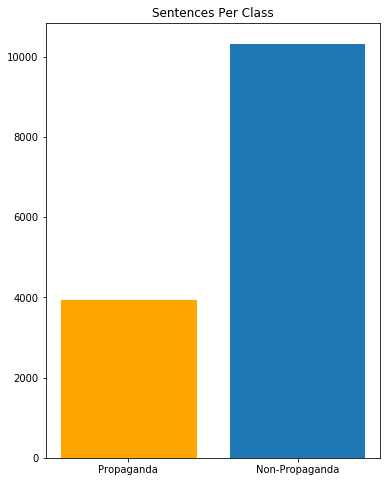

In [53]:
class_freq_count = []

plt.figure(figsize=(6,8))

labels = ["Propaganda", "Non-Propaganda"]
class_freq_count.append(clean_data[clean_data["propaganda"] == "propaganda"]["propaganda"].count())
class_freq_count.append(clean_data[clean_data["propaganda"] == "non-propaganda"]["propaganda"].count())

barlist = plt.bar(labels, class_freq_count)
barlist[0].set_color('orange')

plt.xticks(labels)
plt.title('Sentences Per Class');

plt.show()

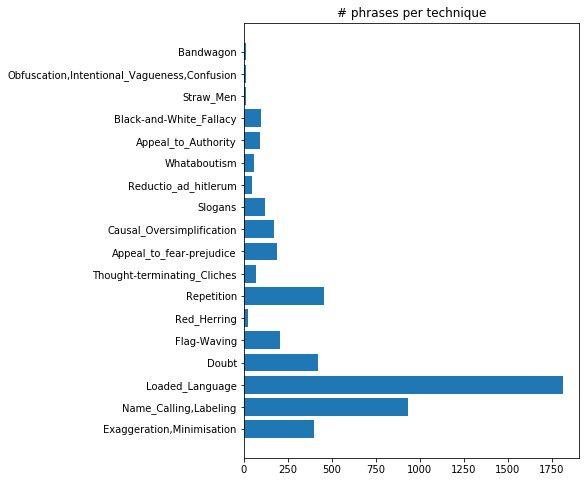

In [57]:

class_freq_count = list(technique.values())

plt.figure(figsize=(6,8))

labels = list(technique.keys())

barlist = plt.barh(labels, class_freq_count)

plt.yticks(labels)
plt.title('# phrases per technique');

plt.show()